In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

dt_clf = DecisionTreeClassifier(random_state=156)

In [40]:
def how_many_label(n_iter, selection, y_min, y_max):
    plt.subplot(3, 2, n_iter)
    bars = plt.bar(['0','1','2'], selection['species'].value_counts().values, color=['r','g','b'])
    for i, b in enumerate(bars):
        plt.text(b.get_x()+b.get_width()*(1/2), b.get_height()+1, 
                selection['species'].value_counts().values[i], ha='center',fontsize=13)
    plt.ylim(y_min, y_max)
    plt.title('{0} Times'.format(n_iter))

# 학습/테스트 데이터 세트 분리 - train_test_split( )
- 학습용 데이터와 테스트 데이터로 분리 -> 총 2개의 데이터로 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


레이블 당 몇개씩을 나누는지에 대한 시각화

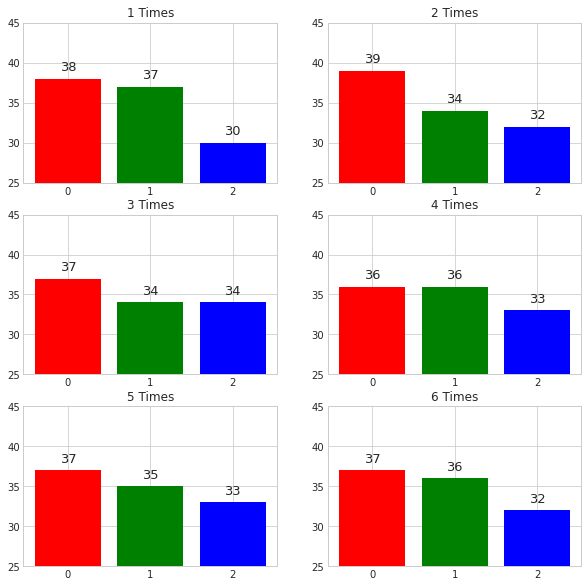

In [41]:
plt.figure(figsize=(10, 10))
for i in range(1, 7):
    # 기본적으로 랜덤하게 데이터를 나눠주며 각각의 레이블에 대한 수는 다르다.
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3)
    noraml_train_test_selection = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    noraml_train_test_selection.columns = [['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','species']]
    
    how_many_label(i, noraml_train_test_selection, 25, 45)

# 교차 검증
- 학습데이터에 대해 과도한 학습을 방지하기 위해 실시
- 데이터의 편중을 막기 위해 별도의 여러 세트로 구성된 학습데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
- K 폴드 교차 검증과 Stratified K 폴드 교차 검증으로 나뉨

## K 폴드 교차 검증
![image](https://user-images.githubusercontent.com/70187490/128149167-e0aed116-eafb-4730-b3a5-41203fe41a73.png)


In [23]:
from sklearn.model_selection import KFold

features = iris.data
label = iris.target

kfold = KFold(n_splits=5)
cv_accuracy=[]

n_iter=0
for train_index, test_index in kfold.split(features):
    
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print('{0}회차 검증 정확도: {1}'.format(n_iter, accuracy))
    cv_accuracy.append(accuracy)
    
    
print('평균 검증 정확도: ', np.mean(cv_accuracy))

1회차 검증 정확도: 1.0
2회차 검증 정확도: 0.9667
3회차 검증 정확도: 0.8667
4회차 검증 정확도: 0.9333
5회차 검증 정확도: 0.7333
평균 검증 정확도:  0.9


레이블 당 몇개씩을 나누는지에 대한 시각화

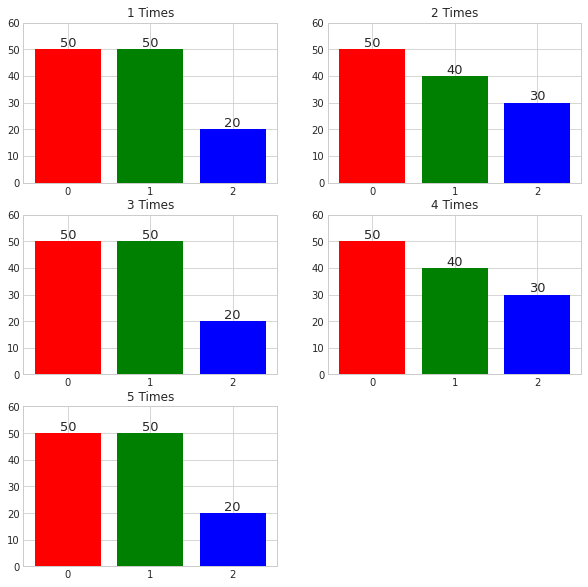

In [42]:
n_iter=0
plt.figure(figsize=(10, 10))
for train_index, test_index in kfold.split(features):
    
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    K_fold_selection = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    K_fold_selection.columns = [['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','species']]

    how_many_label(n_iter, K_fold_selection, 0, 60)

## Stratified K 폴드
- 불균형한(Imbalanced)분포도를 가진 레이블(결정클래스) 데이터 집합을 위한 K 폴드 방식
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함